In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns

In [2]:
data = pd.read_csv("../data/wholesale_customers.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Analysis

In [3]:
data.drop(columns=['Channel','Region'],axis=1,inplace=True)

In [4]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


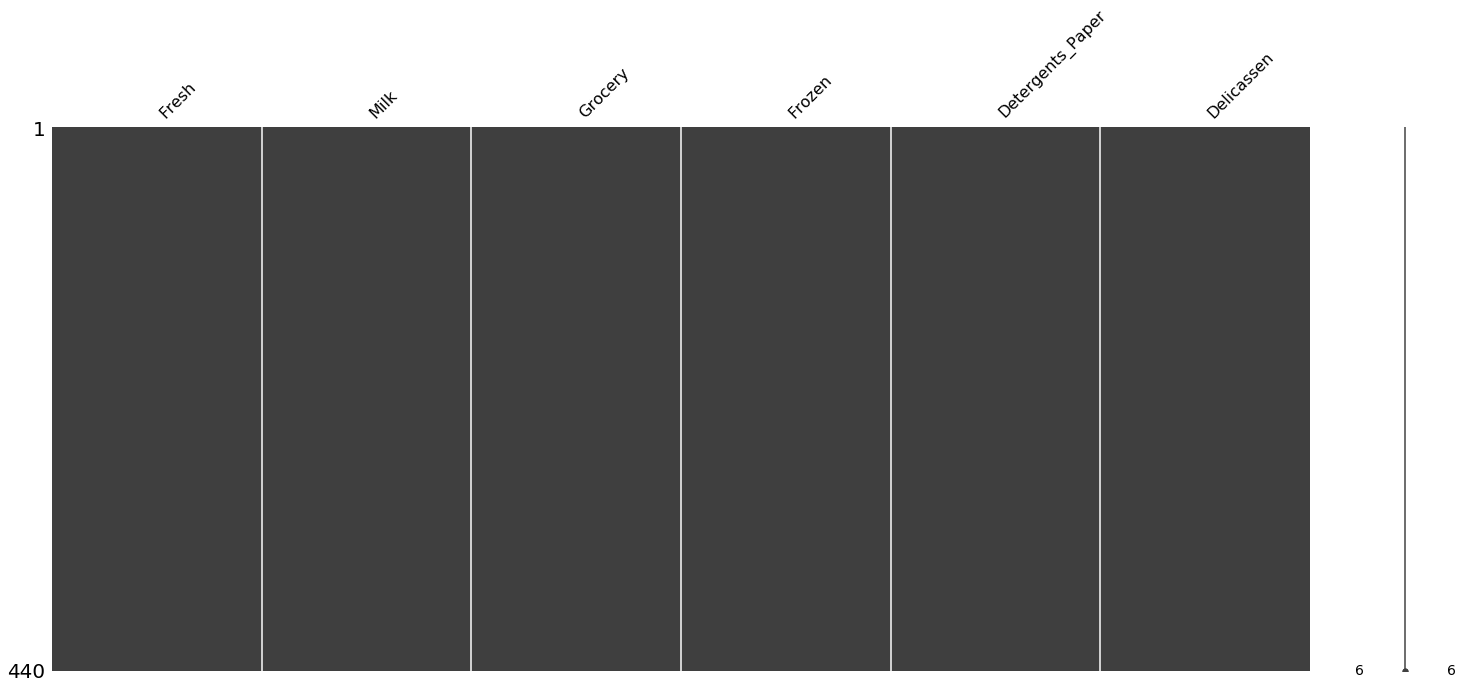

In [5]:
# missing data
msno.matrix(data)

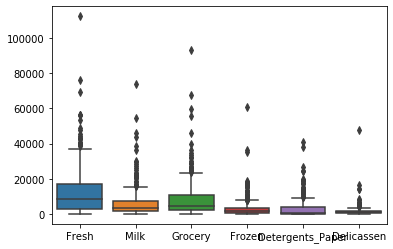

In [6]:
# data distribution
sns.boxplot(data=data,orient='v')

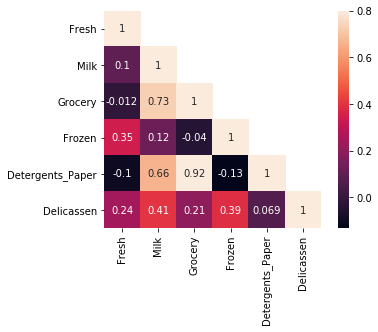

In [7]:
# correlation analysis
corrmat = data.corr()
mask = np.array(corrmat)
mask[np.tril_indices_from(mask)] = False
fig,ax=plt.subplots()
sns.heatmap(corrmat,mask=mask,vmax=.8,square=True,annot=True)

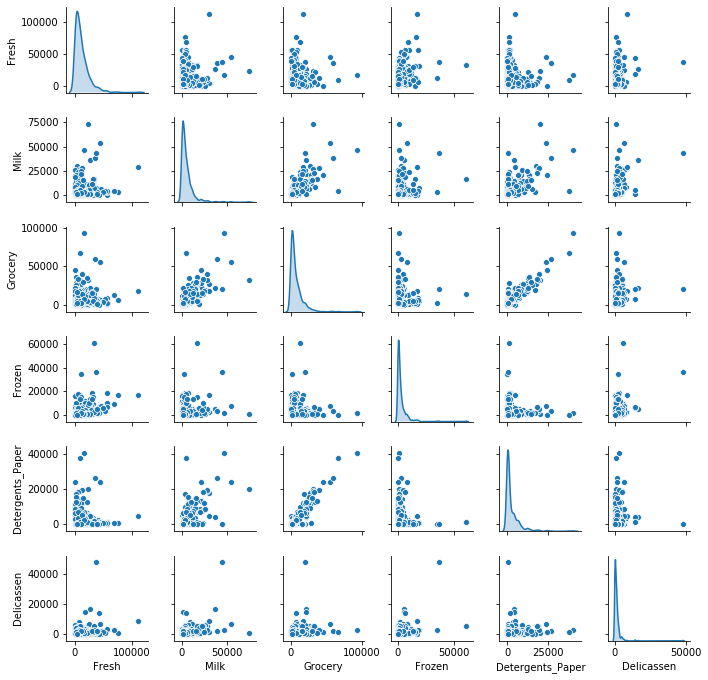

In [8]:
# scatterplot
mx_plot = sns.pairplot(data, diag_kind="kde",height=1.6)
mx_plot

### Feature Engineering and Model building

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

In [10]:
# drop "Grocery" as it has too high correlation with some variables
X = data.drop(columns="Grocery",axis=1)

In [11]:
# scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
X.shape

(440, 5)

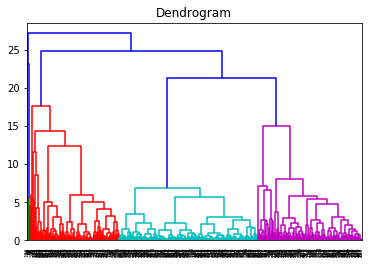

In [12]:
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.show()

In [19]:
# create model
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_hc = model.fit_predict(X)

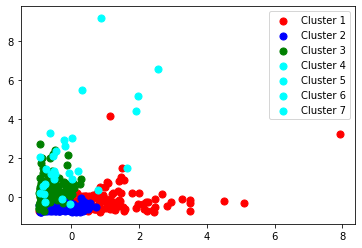

In [21]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'cyan', label = 'Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 50, c = 'cyan', label = 'Cluster 6')
plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 50, c = 'cyan', label = 'Cluster 7')

plt.legend()
plt.show()